In [2]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.applications.vgg16 import VGG16

In [3]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2)
test_datagen=ImageDataGenerator(rescale=1./255)

In [22]:
x_train=train_datagen.flow_from_directory(directory=r'E:\isaa-project\backend\data\train'
                                          ,target_size=(224,224),batch_size=32,class_mode='categorical')

Found 6250 images belonging to 2 classes.


In [23]:
x_test=test_datagen.flow_from_directory(directory=r'E:\isaa-project\backend\data\test'
                                        ,target_size=(224,224),batch_size=32,class_mode='categorical')

Found 854 images belonging to 2 classes.


In [24]:
print(x_train.class_indices)

{'DeepFake': 0, 'Real': 1}


In [25]:
from collections import Counter as c
c(x_train.labels)

Counter({0: 2503, 1: 3747})

In [26]:
model=Sequential()

In [27]:
base_model =  VGG16(input_shape = (224, 224, 3), 
include_top = False, 
weights = 'imagenet')

In [28]:
for layer in base_model.layers:
    layer.trainable = False

In [29]:
x = Flatten()(base_model.output)

In [30]:
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)

x = Dense(2, activation='softmax')(x)

model = Model(base_model.input, x)

model.compile(optimizer = "adam", loss = 'categorical_crossentropy',metrics = ["accuracy"])

In [31]:
a=round(6250/32)
b=round(854/32)
print(a,b)

195 27


In [32]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [34]:
history=model.fit(x_train,steps_per_epoch = a , epochs = 20 , validation_data = x_test,validation_steps = b)

Epoch 1/20
195/195 [==============================] - 77s 390ms/step - loss: 0.0875 - accuracy: 0.9680 - val_loss: 0.0308 - val_accuracy: 0.9906
Epoch 2/20
195/195 [==============================] - 79s 402ms/step - loss: 0.0656 - accuracy: 0.9751 - val_loss: 0.0498 - val_accuracy: 0.9848
Epoch 3/20
195/195 [==============================] - 80s 408ms/step - loss: 0.0487 - accuracy: 0.9833 - val_loss: 0.0919 - val_accuracy: 0.9707
Epoch 4/20
195/195 [==============================] - 110s 562ms/step - loss: 0.0797 - accuracy: 0.9685 - val_loss: 0.0206 - val_accuracy: 0.9918
Epoch 5/20
195/195 [==============================] - 94s 480ms/step - loss: 0.0431 - accuracy: 0.9844 - val_loss: 0.0378 - val_accuracy: 0.9883
Epoch 6/20
195/195 [==============================] - 89s 456ms/step - loss: 0.0626 - accuracy: 0.9760 - val_loss: 0.0435 - val_accuracy: 0.9836
Epoch 7/20
195/195 [==============================] - 82s 420ms/step - loss: 0.0401 - accuracy: 0.9849 - val_loss: 0.0172 - val_a

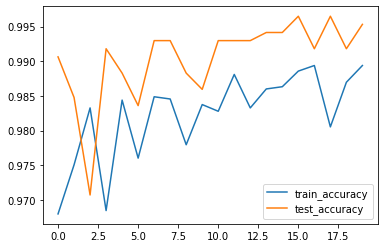

In [35]:
np.save('history_best_2.npy',history.history)
model.save("test_2.h5")


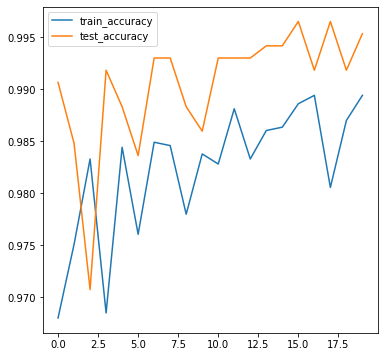

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.plot(history.history['accuracy'],label="train_accuracy")
plt.plot(history.history['val_accuracy'],label="test_accuracy")

plt.legend()

In [38]:
train_loss,train_acc=model.evaluate(x_train)

196/196 [==============================] - 68s 342ms/step - loss: 0.0095 - accuracy: 0.9978


In [39]:
test_loss,test_acc=model.evaluate(x_test)

27/27 [==============================] - 8s 288ms/step - loss: 0.0111 - accuracy: 0.9953


In [54]:
dataGenerator = ImageDataGenerator(rescale=1./255)

# Instantiating generator to feed images through the network
generator = dataGenerator.flow_from_directory(
    './data/',
    target_size=(224, 224),
    batch_size=1,
    class_mode='binary')

Found 7104 images belonging to 2 classes.


In [55]:
generator.class_indices

{'DeepFake': 0, 'Real': 1}

In [56]:
dataGenerator = ImageDataGenerator(rescale=1./255)

generator = dataGenerator.flow_from_directory(
    './data/',
    target_size=(224, 224),
    batch_size=1,
    class_mode='binary')

# Re-checking class assignment after removing it
generator.class_indices

Found 7104 images belonging to 2 classes.


{'DeepFake': 0, 'Real': 1}

Predicted likelihood: 0.0000
Actual label: 1

Correct prediction: False


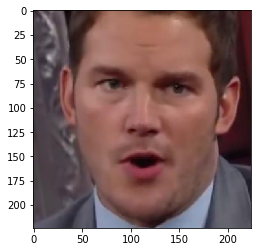

In [57]:
X, y = generator.next()

# Evaluating prediction
print(f"Predicted likelihood: {model.predict(X)[0][0]:.4f}")
print(f"Actual label: {int(y[0])}")
print(f"\nCorrect prediction: {round(model.predict(X)[0][0])==y[0]}")

# Showing image
plt.imshow(np.squeeze(X))

In [58]:
correct_real = []
correct_real_pred = []

correct_deepfake = []
correct_deepfake_pred = []

misclassified_real = []
misclassified_real_pred = []

misclassified_deepfake = []
misclassified_deepfake_pred = []

In [59]:
for i in range(len(generator.labels)):
    
    # Loading next picture, generating prediction
    X, y = generator.next()
    pred = model.predict(X)[0][0]
    
    # Sorting into proper category
    if round(pred)==y[0] and y[0]==1:
        correct_real.append(X)
        correct_real_pred.append(pred)
    elif round(pred)==y[0] and y[0]==0:
        correct_deepfake.append(X)
        correct_deepfake_pred.append(pred)
    elif y[0]==1:
        misclassified_real.append(X)
        misclassified_real_pred.append(pred)
    else:
        misclassified_deepfake.append(X)
        misclassified_deepfake_pred.append(pred)   
        
    # Printing status update
    if i % 1000 == 0:
        print(i, ' predictions completed.')
    
    if i == len(generator.labels)-1:
        print("All", len(generator.labels), "predictions completed")

0  predictions completed.
1000  predictions completed.
2000  predictions completed.
3000  predictions completed.
4000  predictions completed.
5000  predictions completed.
6000  predictions completed.
7000  predictions completed.
All 7104 predictions completed


In [60]:
def plotter(images,preds):
    fig = plt.figure(figsize=(16,9))
    subset = np.random.randint(0, len(images)-1, 12)
    for i,j in enumerate(subset):
        fig.add_subplot(3,4,i+1)
        plt.imshow(np.squeeze(images[j]))
        plt.xlabel(f"Model confidence: \n{preds[j]:.4f}")
        plt.tight_layout()
        ax = plt.gca()
        ax.axes.xaxis.set_ticks([])
        ax.axes.yaxis.set_ticks([])
    plt.show
    return

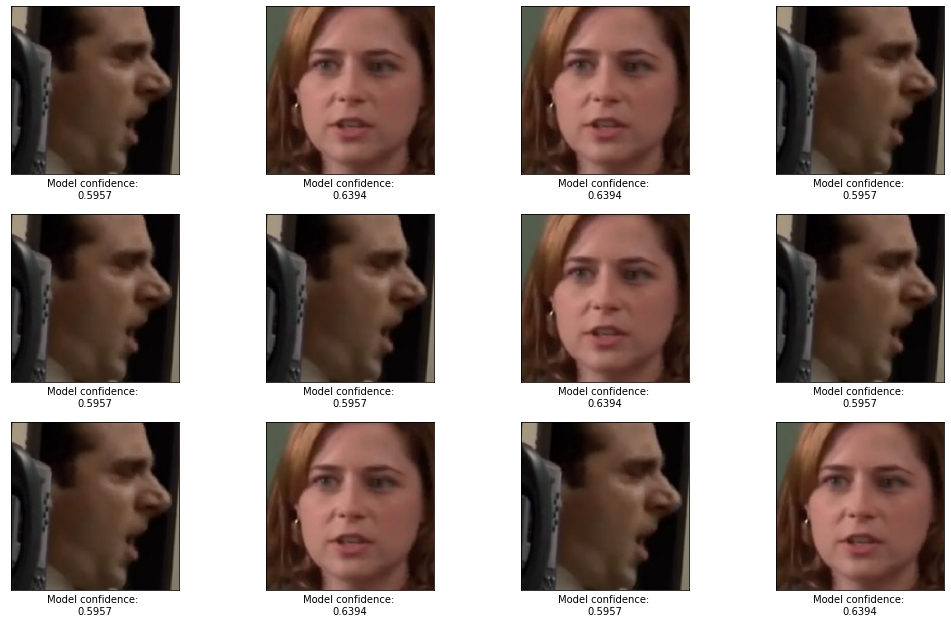

In [61]:
plotter(correct_real, correct_real_pred)

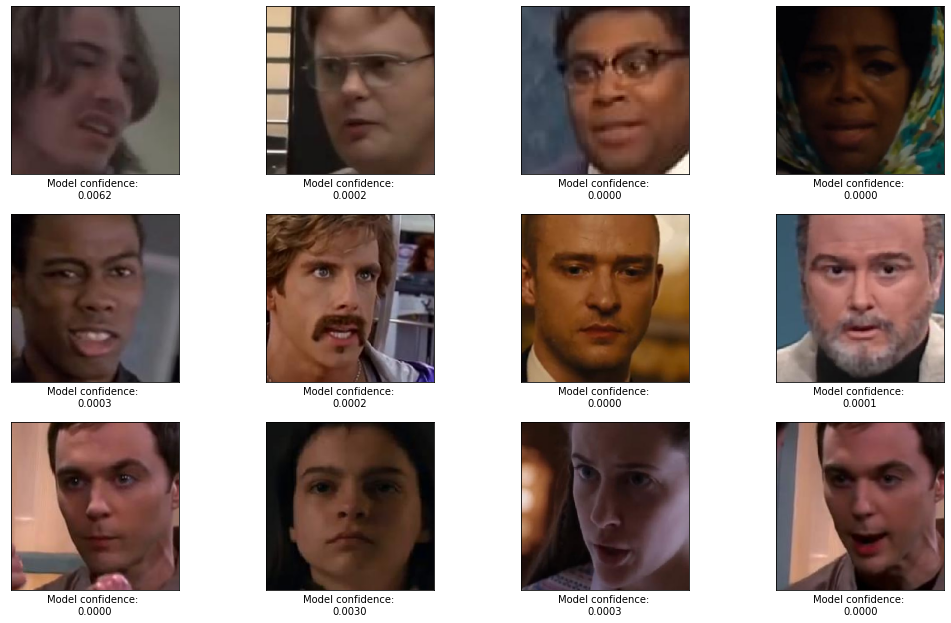

In [62]:
plotter(misclassified_real, misclassified_real_pred)

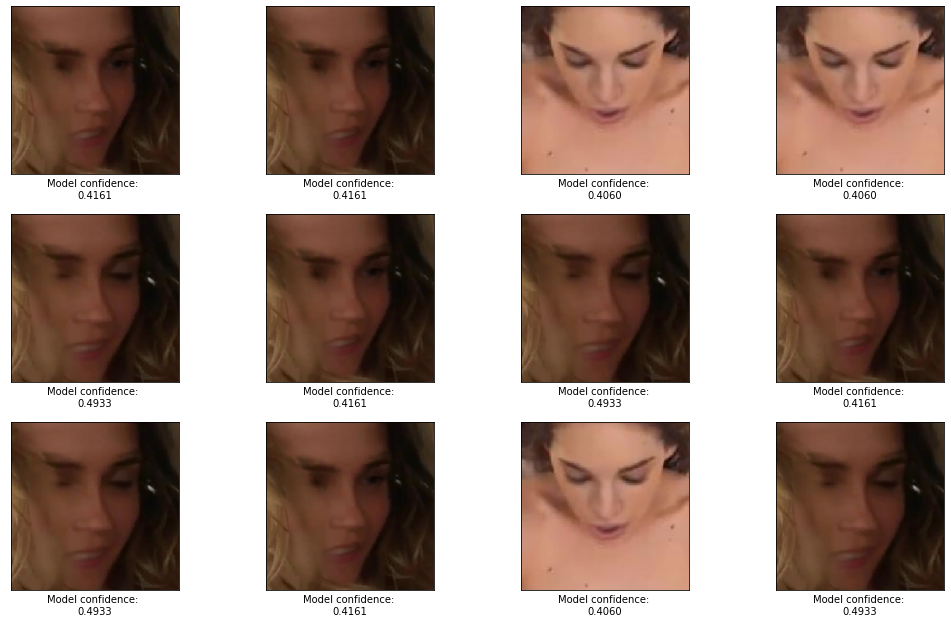

In [63]:
plotter(correct_deepfake, correct_deepfake_pred)

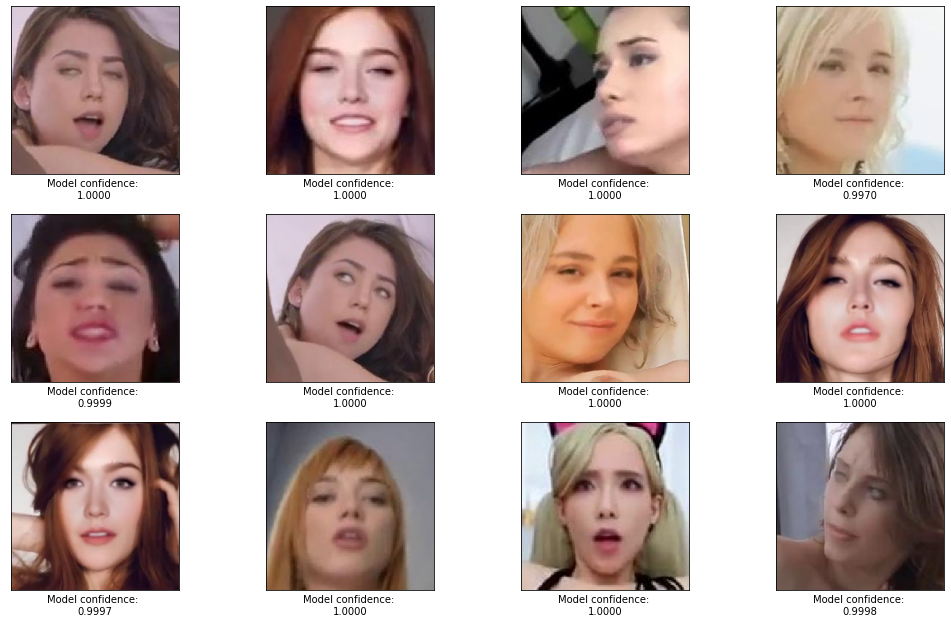

In [64]:
plotter(misclassified_deepfake, misclassified_deepfake_pred)